In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import src.text_analysis as ta

In [2]:
amz_rev = pd.read_json('input/Cell_Phones_and_Accessories_5.json', lines=True)

In [3]:
display(amz_rev.head())
print(amz_rev.shape)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN


(1128437, 12)


In [4]:
amz_rev.isna().any()

overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
style              True
reviewerName       True
reviewText         True
summary            True
unixReviewTime    False
vote               True
image              True
dtype: bool

In [5]:
columns = ['reviewText','reviewerName','summary']
for col in columns:
    amz_rev = amz_rev[amz_rev[col].notnull()]

In [6]:
columns = ['reviewTime','style']
for col in columns:
    amz_rev.drop([col], axis=1, inplace=True)

In [7]:
amz_rev['unixReviewTime'] = pd.to_datetime(amz_rev['unixReviewTime'], unit='s')
amz_rev.rename(columns={"unixReviewTime": "reviewTime"}, inplace=True)

In [8]:
columns = ['vote','image']
for col in columns:
    amz_rev[col] = amz_rev[col].fillna(0)
    amz_rev[col] = amz_rev[col].apply(lambda x : 1 if (x!=0) else 0)

In [9]:
amz_rev['verified']=np.where(amz_rev['verified'] == True ,1,0)

In [10]:
print(amz_rev.shape)

(1127073, 10)


In [11]:
print(amz_rev.isna().any())

overall         False
verified        False
reviewerID      False
asin            False
reviewerName    False
reviewText      False
summary         False
reviewTime      False
vote            False
image           False
dtype: bool


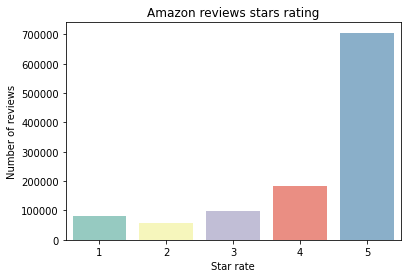

In [12]:
ax = sns.countplot(x="overall",data=amz_rev, palette="Set3")
ax.set(xlabel='Star rate', ylabel='Number of reviews')
plt.title('Amazon reviews stars rating')
plt.show()

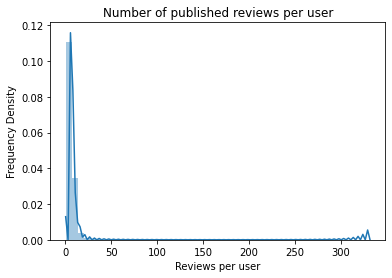

Max reviews per user: 331
Mean of reviews per user: 7.17


In [13]:
rws_per_user = amz_rev.groupby(['overall','reviewerID']).size().groupby(level=1).sum()
ax = sns.distplot(rws_per_user)
ax.set(xlabel='Reviews per user', ylabel='Frequency Density')
plt.title('Number of published reviews per user')
plt.show()
print(f'Max reviews per user: {rws_per_user.max()}')
print(f'Mean of reviews per user: {rws_per_user.mean():.2f}')

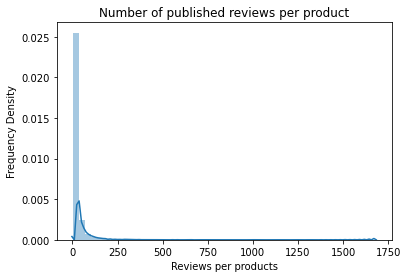

Max reviews per product: 1680
Mean of reviews per product: 23.39


In [14]:
rws_per_asin = amz_rev.groupby(['overall','asin']).size().groupby(level=1).sum()
ax = sns.distplot(rws_per_asin)
ax.set(xlabel='Reviews per products', ylabel='Frequency Density')
plt.title('Number of published reviews per product')
plt.show()
print(f'Max reviews per product: {rws_per_asin.max()}')
print(f'Mean of reviews per product: {rws_per_asin.mean():.2f}')

In [15]:
display(amz_rev.groupby(['reviewerID','reviewerName','reviewTime'],as_index=False).agg({'reviewTime': 'count'}).head())


,reviewerID,reviewerName,reviewTime
0,A0009478CBXKUCALUC7U,Kyle Crawford,3
1,A0009478CBXKUCALUC7U,Kyle Crawford,2
2,A0009478CBXKUCALUC7U,Kyle Crawford,1
3,A0024936S1WI02OHH9DP,JoAnna Bobo,4
4,A0024936S1WI02OHH9DP,JoAnna Bobo,1


In [16]:
#Pandas Duplicated
amz_rev['Multiple_r_day'] = amz_rev.duplicated(subset=['reviewTime'],keep=False)
amz_rev['Same_r_text'] = amz_rev.duplicated(subset=['reviewText'],keep=False)
amz_rev['Multiple_r_day']=np.where(amz_rev['Multiple_r_day'] == True ,1,0)
amz_rev['Same_r_text']=np.where(amz_rev['Same_r_text'] == True ,1,0)
amz_rev['spam_reviewer'] = np.where((amz_rev['Multiple_r_day']==True)&(amz_rev['Same_r_text']== True) ,1,0)

In [17]:
amz_rev[amz_rev.reviewerID=='A269FLZCB4GIPV'].head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,reviewTime,vote,image,Multiple_r_day,Same_r_text,spam_reviewer
1,5,1,A269FLZCB4GIPV,7508492919,sarah ponce,When you don't want to spend a whole lot of ca...,1,2014-02-12,0,0,1,1,1
77078,5,1,A269FLZCB4GIPV,B005O19SOO,sarah ponce,When you don't want to spend a whole lot of ca...,Deal!,2014-02-12,0,0,1,1,1
108893,5,1,A269FLZCB4GIPV,B0077L0KTG,sarah ponce,When you don't want to spend a whole lot of ca...,great,2014-02-12,0,0,1,1,1
135695,5,1,A269FLZCB4GIPV,B0090G1DJ2,sarah ponce,When you don't want to spend a whole lot of ca...,ok,2014-02-12,0,0,1,1,1
160519,5,1,A269FLZCB4GIPV,B009IFU5P8,sarah ponce,When you don't want to spend a whole lot of ca...,good,2014-02-12,0,0,1,1,1


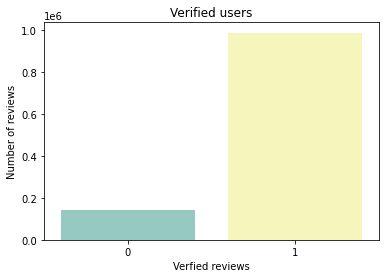

The verified reviews ratio is: 87.49%


In [18]:
ax = sns.countplot(x="verified",data=amz_rev, palette="Set3")
ax.set(xlabel='Verfied reviews', ylabel='Number of reviews')
plt.title('Verified users')
plt.show()
print(f'The verified reviews ratio is: {ta.ratio(amz_rev,"verified",1):.2f}%')

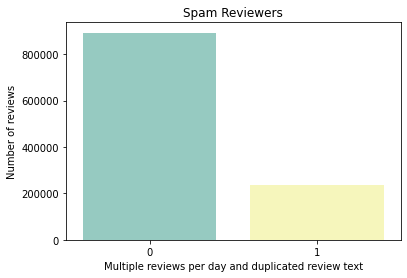

The spam reviews ratio is: 20.84%


In [19]:
ax = sns.countplot(x='spam_reviewer',data=amz_rev, palette="Set3")
ax.set(xlabel='Multiple reviews per day and duplicated review text', ylabel='Number of reviews')
plt.title('Spam Reviewers')
plt.show()
print(f'The spam reviews ratio is: {ta.ratio(amz_rev,"spam_reviewer",1):.2f}%')

In [20]:
amz_rev['spam_reviewer'].value_counts()

0    892157
1    234916
Name: spam_reviewer, dtype: int64

In [21]:
stars = [1,2,3,4,5]
for idx in stars:
    print(f'Spam_reviewer for {idx} stars')
    print(f"Possible real reviews{amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[0]}")
    print(f"Possible spam reviews{amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[1]}")
    print(f"Spam rate {(amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[1])/((amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[0])+(amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[0]))*100:.2f}%""\n")

Spam_reviewer for 1 stars
Possible real reviews73903
Possible spam reviews7553
Spam rate 5.11%

Spam_reviewer for 2 stars
Possible real reviews52502
Possible spam reviews4648
Spam rate 4.43%

Spam_reviewer for 3 stars
Possible real reviews85949
Possible spam reviews12229
Spam rate 7.11%

Spam_reviewer for 4 stars
Possible real reviews153047
Possible spam reviews31214
Spam rate 10.20%

Spam_reviewer for 5 stars
Possible real reviews526756
Possible spam reviews179272
Spam rate 17.02%



#### On Amazon 4 and 5 stars are considering positive feedback and 1, 2 and 3 are negative, but usually, users associate 3 stars reviews to a neutral experience and often are the most truthful reviews.

In [22]:
amz_rev.drop(amz_rev.query('overall == 3').index, inplace=True)

#### In order to balance the dataset, we are going to get rid of possible real reviews

In [23]:
amz_rev.drop(amz_rev.query('spam_reviewer == 0').sample(frac=.70).index, inplace=True)
amz_rev['spam_reviewer'].value_counts()

0    241862
1    222687
Name: spam_reviewer, dtype: int64

In [24]:
stars = [1,2,4,5]
for idx in stars:
    print(f'Spam_reviewer for {idx} stars')
    print(f"Possible real reviews{amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[0]}")
    print(f"Possible spam reviews{amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[1]}")
    print(f"Spam rate {(amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[1])/((amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[0])+(amz_rev[amz_rev.overall==idx]['spam_reviewer'].value_counts()[0]))*100:.2f}%""\n")

Spam_reviewer for 1 stars
Possible real reviews21984
Possible spam reviews7553
Spam rate 17.18%

Spam_reviewer for 2 stars
Possible real reviews15754
Possible spam reviews4648
Spam rate 14.75%

Spam_reviewer for 4 stars
Possible real reviews45844
Possible spam reviews31214
Spam rate 34.04%

Spam_reviewer for 5 stars
Possible real reviews158280
Possible spam reviews179272
Spam rate 56.63%



In [25]:
amz_rev.isna().any()

overall           False
verified          False
reviewerID        False
asin              False
reviewerName      False
reviewText        False
summary           False
reviewTime        False
vote              False
image             False
Multiple_r_day    False
Same_r_text       False
spam_reviewer     False
dtype: bool

#### There are too much data to process, so I´m going to generate eight batches of eight thousand samples each.


In [26]:
amz_rev = amz_rev.sample(n=64000)
amz_rev.reset_index(inplace=True, drop=True)
amz_rev['spam_reviewer'].value_counts()

0    33290
1    30710
Name: spam_reviewer, dtype: int64

#### Polarity and subjectivity analysis

In [27]:
polarity,subjectivity = ta.sentimental(amz_rev.reviewText)
amz_rev['polarity'] = polarity
amz_rev['subjectivity'] = subjectivity

#### Readability analysis and words counting.

In [28]:
lexicon_count, flesch_reading = ta.textscore(amz_rev.reviewText)
amz_rev['num_words'] = lexicon_count
amz_rev['flesch_score'] = flesch_reading

#### Verbs, nouns and prp ratios.

In [29]:
tags = ['verbs','nouns','prp']
for tag in tags:
    amz_rev[f'{tag}_ratio'] = (ta.tags_collector (tag, amz_rev['reviewText'])/amz_rev.num_words).round(decimals=2)

#### Grammar review.

In [30]:
gram_check = ta.grammar(amz_rev['reviewText'])
amz_rev['grammar'] = gram_check

In [31]:
print(amz_rev.shape)

(64000, 20)


In [32]:
amz_rev.isna().any()

overall           False
verified          False
reviewerID        False
asin              False
reviewerName      False
reviewText        False
summary           False
reviewTime        False
vote              False
image             False
Multiple_r_day    False
Same_r_text       False
spam_reviewer     False
polarity          False
subjectivity      False
num_words         False
flesch_score      False
verbs_ratio        True
nouns_ratio        True
prp_ratio          True
dtype: bool

In [33]:
amz_rev.dropna(inplace=True)

In [34]:
amz_rev.isna().any()


overall           False
verified          False
reviewerID        False
asin              False
reviewerName      False
reviewText        False
summary           False
reviewTime        False
vote              False
image             False
Multiple_r_day    False
Same_r_text       False
spam_reviewer     False
polarity          False
subjectivity      False
num_words         False
flesch_score      False
verbs_ratio       False
nouns_ratio       False
prp_ratio         False
dtype: bool

In [35]:
print(amz_rev.shape)

(63949, 20)


#### Double-checking the batches to make sure that are balanced.

In [36]:
batch1 = amz_rev[:8000]

In [37]:
batch1['spam_reviewer'].value_counts()

0    4198
1    3802
Name: spam_reviewer, dtype: int64

In [38]:
batch2 = amz_rev[8000:16000]
batch3 = amz_rev[16000:24000]
batch4 = amz_rev[24000:32000]
batch5 = amz_rev[32000:40000]
batch6 = amz_rev[40000:48000]
batch7 = amz_rev[48000:56000]
batch8 = amz_rev[56000:]

In [39]:
batch4['spam_reviewer'].value_counts()

0    4061
1    3939
Name: spam_reviewer, dtype: int64

In [40]:
amz_rev.to_csv('output/amz_final.csv',index=False)